In [63]:
import pandas as pd

In [64]:
#let us load the data and check what it contains

In [65]:
dataset1=pd.read_csv('train.csv')
dataset2=pd.read_csv('test.csv')
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
#now let us see what type of values the data holds and if it contains any missing values

In [67]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
dataset1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
#let us fill the missing data values

In [70]:
median_age=dataset1['Age'].median()
dataset1['Age'].fillna(median_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [71]:
mode_embarked = dataset1['Embarked'].mode()[0]
dataset1['Embarked'] = dataset1['Embarked'].fillna(mode_embarked)

In [72]:
dataset1['HasCabin'] = dataset1['Cabin'].notnull().astype(int)
dataset1['Cabin'] = dataset1['Cabin'].fillna('Unknown')

In [73]:
#for fare we will take the median value to fill up missing data

In [74]:
median_fare = dataset1.groupby('Pclass')['Fare'].median()
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return median_fare[row['Pclass']]
    else:
        return row['Fare']

dataset1['Fare'] = dataset1.apply(fill_fare, axis=1)

In [75]:
dataset1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [76]:
#let us perform feature engineering

In [77]:
#we will use label encoding and one-hot encoding, label encoding provides the feature sex where(male=0 ,female=1)

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset1['Sex'] = le.fit_transform(dataset1['Sex'])

In [79]:
dataset1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,Unknown,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,Unknown,S,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1


In [80]:
#similarly let us perform one-hot encoding for embarked row

In [81]:
dataset1 = pd.get_dummies(dataset1, columns=['Embarked'], drop_first=True)

In [82]:
#let us use feature scaling ensuring all features contribute equally for that we use normalization and standardization

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset1[['Age', 'Fare']] = scaler.fit_transform(dataset1[['Age', 'Fare']])
#rescales these values so that mean is 0 and SD is 1

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset1[['Age', 'Fare']] = scaler.fit_transform(dataset1[['Age', 'Fare']])
#where the range is from 0 to 1

In [85]:
dataset1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,HasCabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,Unknown,0,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,C85,1,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,Unknown,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,C123,1,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,Unknown,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0,0,211536,0.025374,Unknown,0,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.233476,0,0,112053,0.058556,B42,1,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,0.045771,Unknown,0,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,0.321438,0,0,111369,0.058556,C148,1,False,False


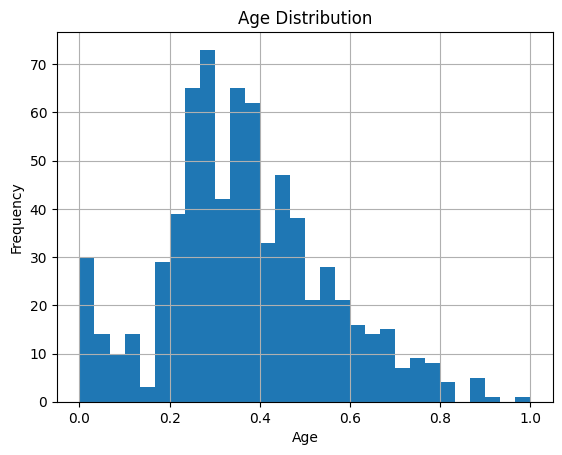

In [86]:
import matplotlib.pyplot as plt

dataset1['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [87]:
#let us analyse the survival rate

In [88]:
survival_rate_by_class = dataset1.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [89]:
#missing data understanding and visualisation

In [90]:
missing_summary = dataset1.isnull().sum()
missing_summary
#so no missing data can be concluded

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
HasCabin         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [91]:
#let us combine 2 features which are spouse and parents into one called family size

In [92]:
dataset1['FamilySize'] = dataset1['SibSp'] + dataset1['Parch']

In [93]:
#let us remove outliners

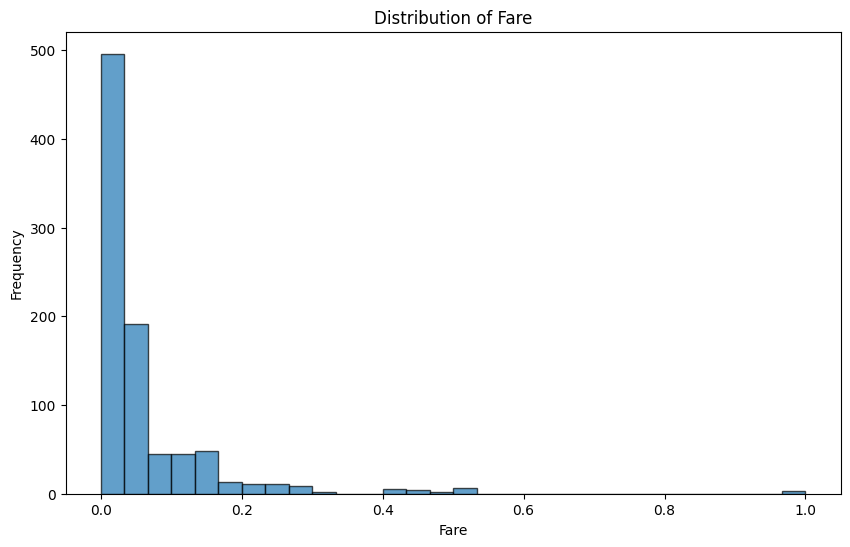

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(dataset1['Fare'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [95]:
threshold = 0.95
dataset1 = dataset1[dataset1['Fare'] < threshold]

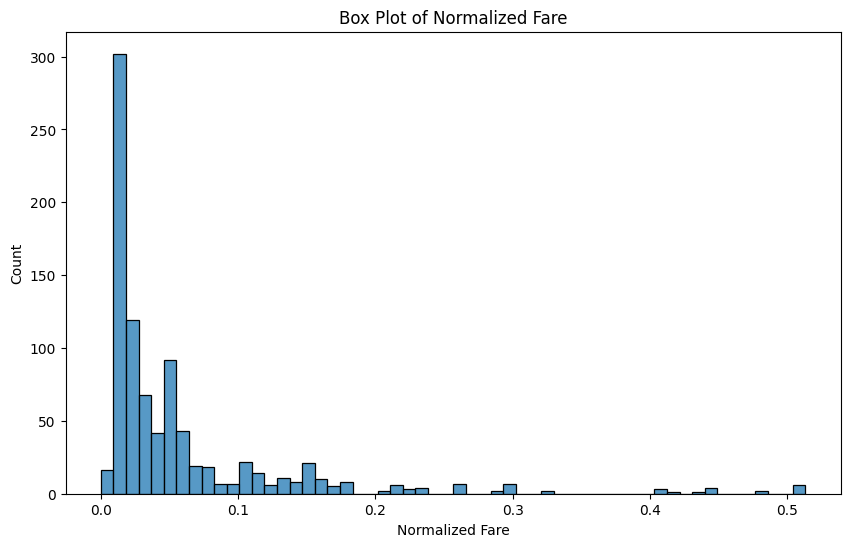

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(x=dataset1['Fare'])
plt.title('Box Plot of Normalized Fare')
plt.xlabel('Normalized Fare')
plt.show()

In [97]:
#let us split the data now!
from sklearn.model_selection import train_test_split

X = dataset1.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)  # Features
y = dataset1['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [103]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8089887640449438
